In [1]:
import time
import numpy as np
import autograd.numpy as np1
import torch
from torch import Tensor
from train import train_hypernetwork, train_neural_ode, l1, l2
from naliu import TestODEF
from neural_ode import NeuralODE
from utils import circle_points, plot_trajectories

# Define

In [2]:
from scipy.optimize import Bounds

In [3]:
class Problem():
    def __init__(self, f, jac_f, C, Q, dim_x, dim_y, proj_C, proj_Qplus):
        self.f = f
        self.jac_f = jac_f
        self.C = C
        self.Q = Q
        self.dim_x = dim_x
        self.dim_y = dim_y
        self.proj_C = proj_C
        self.proj_Qplus = proj_Qplus
    
    def objective_func(self, x):
        vals = [func(x) for func in self.f]
        return np.concatenate(vals)  

In [4]:
def f1(x):
    return 4*x[0]**2 + 4*x[1]**2

def f2(x):
    return (x[0] - 5)**2 + (x[1] - 5)**2

prob = Problem(
    f=[f1, f2], jac_f=[], C=[], Q=[], 
    dim_x=None, dim_y=None,
    proj_C=None,
    proj_Qplus=None
)

In [8]:
import yaml
config_path='../4_Pareto_front/config.yaml'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
test_rays = np.array(cfg['data']['test_ray'])
ref_point = torch.tensor([75.23575795, 25.50204271])

In [ ]:
hnet, all_rays_flat = train_hypernetwork(prob, ref_point)

Training Hypernetwork (Gradient Accumulation Mode)...


  0%|          | 4/20000 [00:00<09:04, 36.73it/s]


Epoch 0, Mean Loss: 12.1893


  1%|          | 109/20000 [00:02<07:44, 42.85it/s]


Epoch 100, Mean Loss: -5.9081


  1%|          | 209/20000 [00:04<07:38, 43.16it/s]


Epoch 200, Mean Loss: -7.3772


  2%|▏         | 309/20000 [00:07<07:38, 42.91it/s]


Epoch 300, Mean Loss: -7.4767


  2%|▏         | 409/20000 [00:09<07:40, 42.51it/s]


Epoch 400, Mean Loss: -7.6361


  3%|▎         | 509/20000 [00:11<07:38, 42.49it/s]


Epoch 500, Mean Loss: -7.6511


  3%|▎         | 609/20000 [00:14<07:27, 43.37it/s]


Epoch 600, Mean Loss: -7.6013


  4%|▎         | 709/20000 [00:16<07:26, 43.19it/s]


Epoch 700, Mean Loss: -7.6494


  4%|▍         | 809/20000 [00:18<07:25, 43.11it/s]


Epoch 800, Mean Loss: -7.6039


  5%|▍         | 904/20000 [00:21<07:27, 42.68it/s]


Epoch 900, Mean Loss: -7.7570


  5%|▌         | 1009/20000 [00:23<07:03, 44.82it/s]


Epoch 1000, Mean Loss: -7.6384


  6%|▌         | 1109/20000 [00:25<07:01, 44.77it/s]


Epoch 1100, Mean Loss: -7.5940


  6%|▌         | 1209/20000 [00:27<07:01, 44.53it/s]


Epoch 1200, Mean Loss: -7.6932


  7%|▋         | 1309/20000 [00:30<07:00, 44.44it/s]


Epoch 1300, Mean Loss: -7.6725


  7%|▋         | 1409/20000 [00:32<07:05, 43.72it/s]


Epoch 1400, Mean Loss: -7.6268


  8%|▊         | 1509/20000 [00:34<06:57, 44.27it/s]


Epoch 1500, Mean Loss: -7.6974


  8%|▊         | 1609/20000 [00:37<06:55, 44.30it/s]


Epoch 1600, Mean Loss: -7.7321


  9%|▊         | 1709/20000 [00:39<06:48, 44.74it/s]


Epoch 1700, Mean Loss: -7.6785


  9%|▉         | 1809/20000 [00:41<06:50, 44.36it/s]


Epoch 1800, Mean Loss: -7.6842


 10%|▉         | 1909/20000 [00:43<06:44, 44.76it/s]


Epoch 1900, Mean Loss: -7.7153


 10%|█         | 2009/20000 [00:46<06:43, 44.57it/s]


Epoch 2000, Mean Loss: -7.5862


 11%|█         | 2109/20000 [00:48<06:45, 44.07it/s]


Epoch 2100, Mean Loss: -7.6837


 11%|█         | 2209/20000 [00:50<06:45, 43.83it/s]


Epoch 2200, Mean Loss: -7.5873


 12%|█▏        | 2309/20000 [00:52<06:45, 43.64it/s]


Epoch 2300, Mean Loss: -7.7303


 12%|█▏        | 2409/20000 [00:55<06:41, 43.85it/s]


Epoch 2400, Mean Loss: -7.5762


 13%|█▎        | 2509/20000 [00:57<06:35, 44.22it/s]


Epoch 2500, Mean Loss: -7.6065


 13%|█▎        | 2609/20000 [00:59<06:34, 44.14it/s]


Epoch 2600, Mean Loss: -7.6156


 14%|█▎        | 2709/20000 [01:02<06:44, 42.71it/s]


Epoch 2700, Mean Loss: -7.4811


 14%|█▍        | 2805/20000 [01:04<07:09, 40.01it/s]


Epoch 2800, Mean Loss: -7.5322


 15%|█▍        | 2907/20000 [01:06<06:30, 43.77it/s]


Epoch 2900, Mean Loss: -7.5523


 15%|█▌        | 3007/20000 [01:09<06:31, 43.40it/s]


Epoch 3000, Mean Loss: -7.7328


 16%|█▌        | 3107/20000 [01:11<06:38, 42.38it/s]


Epoch 3100, Mean Loss: -7.5875


 16%|█▌        | 3207/20000 [01:13<06:30, 43.00it/s]


Epoch 3200, Mean Loss: -7.6619


 17%|█▋        | 3307/20000 [01:16<06:19, 44.01it/s]


Epoch 3300, Mean Loss: -7.6869


 17%|█▋        | 3407/20000 [01:18<06:18, 43.79it/s]


Epoch 3400, Mean Loss: -7.7186


 18%|█▊        | 3507/20000 [01:20<06:06, 45.01it/s]


Epoch 3500, Mean Loss: -7.6161


 18%|█▊        | 3607/20000 [01:22<06:05, 44.88it/s]


Epoch 3600, Mean Loss: -7.6217


 19%|█▊        | 3707/20000 [01:25<06:03, 44.80it/s]


Epoch 3700, Mean Loss: -7.5716


 19%|█▉        | 3807/20000 [01:27<06:10, 43.70it/s]


Epoch 3800, Mean Loss: -7.8052


 20%|█▉        | 3907/20000 [01:29<06:08, 43.71it/s]


Epoch 3900, Mean Loss: -7.5756


 20%|██        | 4007/20000 [01:32<06:05, 43.76it/s]


Epoch 4000, Mean Loss: -7.6214


 21%|██        | 4107/20000 [01:34<06:02, 43.88it/s]


Epoch 4100, Mean Loss: -7.6990


 21%|██        | 4207/20000 [01:36<05:55, 44.36it/s]


Epoch 4200, Mean Loss: -7.5180


 22%|██▏       | 4307/20000 [01:38<05:54, 44.24it/s]


Epoch 4300, Mean Loss: -7.6068


 22%|██▏       | 4407/20000 [01:41<05:47, 44.87it/s]


Epoch 4400, Mean Loss: -7.6515


 23%|██▎       | 4507/20000 [01:43<05:46, 44.75it/s]


Epoch 4500, Mean Loss: -7.6317


 23%|██▎       | 4607/20000 [01:45<05:51, 43.83it/s]


Epoch 4600, Mean Loss: -7.5336


 24%|██▎       | 4707/20000 [01:47<05:39, 45.10it/s]


Epoch 4700, Mean Loss: -7.6778


 24%|██▍       | 4807/20000 [01:50<05:36, 45.19it/s]


Epoch 4800, Mean Loss: -7.7456


 25%|██▍       | 4907/20000 [01:52<05:53, 42.75it/s]


Epoch 4900, Mean Loss: -7.6349


 25%|██▌       | 5007/20000 [01:54<05:38, 44.33it/s]


Epoch 5000, Mean Loss: -7.5839


 26%|██▌       | 5107/20000 [01:56<05:55, 41.86it/s]


Epoch 5100, Mean Loss: -7.7797


 26%|██▌       | 5207/20000 [01:59<05:51, 42.08it/s]


Epoch 5200, Mean Loss: -7.7808


 27%|██▋       | 5306/20000 [02:01<05:58, 40.95it/s]


Epoch 5300, Mean Loss: -7.5901


 27%|██▋       | 5408/20000 [02:04<06:04, 40.02it/s]


Epoch 5400, Mean Loss: -7.6201


 28%|██▊       | 5508/20000 [02:06<05:53, 40.97it/s]


Epoch 5500, Mean Loss: -7.6906


 28%|██▊       | 5606/20000 [02:09<05:47, 41.45it/s]


Epoch 5600, Mean Loss: -7.7159


 29%|██▊       | 5709/20000 [02:11<05:48, 40.99it/s]


Epoch 5700, Mean Loss: -7.8040


 29%|██▉       | 5809/20000 [02:14<05:46, 40.94it/s]


Epoch 5800, Mean Loss: -7.6900


 30%|██▉       | 5908/20000 [02:16<05:38, 41.63it/s]


Epoch 5900, Mean Loss: -7.7205


 30%|███       | 6007/20000 [02:19<06:16, 37.19it/s]


Epoch 6000, Mean Loss: -7.5497


 31%|███       | 6108/20000 [02:21<05:16, 43.86it/s]


Epoch 6100, Mean Loss: -7.6004


 31%|███       | 6208/20000 [02:23<05:25, 42.43it/s]


Epoch 6200, Mean Loss: -7.5443


 32%|███▏      | 6308/20000 [02:26<05:18, 42.94it/s]


Epoch 6300, Mean Loss: -7.6420


 32%|███▏      | 6408/20000 [02:28<05:24, 41.95it/s]


Epoch 6400, Mean Loss: -7.5944


 33%|███▎      | 6508/20000 [02:31<05:15, 42.71it/s]


Epoch 6500, Mean Loss: -7.5687


 33%|███▎      | 6608/20000 [02:33<05:16, 42.33it/s]


Epoch 6600, Mean Loss: -7.6901


 34%|███▎      | 6708/20000 [02:35<05:26, 40.72it/s]


Epoch 6700, Mean Loss: -7.7003


 34%|███▍      | 6808/20000 [02:38<05:11, 42.41it/s]


Epoch 6800, Mean Loss: -7.5344


 35%|███▍      | 6908/20000 [02:40<05:06, 42.78it/s]


Epoch 6900, Mean Loss: -7.6418


 35%|███▌      | 7008/20000 [02:42<05:14, 41.27it/s]


Epoch 7000, Mean Loss: -7.6387


 36%|███▌      | 7108/20000 [02:45<04:54, 43.83it/s]


Epoch 7100, Mean Loss: -7.6562


 36%|███▌      | 7208/20000 [02:47<05:04, 42.05it/s]


Epoch 7200, Mean Loss: -7.6482


 37%|███▋      | 7308/20000 [02:49<04:49, 43.91it/s]


Epoch 7300, Mean Loss: -7.6094


 37%|███▋      | 7408/20000 [02:52<05:11, 40.42it/s]


Epoch 7400, Mean Loss: -7.7633


 38%|███▊      | 7508/20000 [02:54<05:11, 40.14it/s]


Epoch 7500, Mean Loss: -7.6208


 38%|███▊      | 7608/20000 [02:57<05:05, 40.62it/s]


Epoch 7600, Mean Loss: -7.6756


 39%|███▊      | 7708/20000 [02:59<04:45, 43.07it/s]


Epoch 7700, Mean Loss: -7.5412


 39%|███▉      | 7807/20000 [03:01<05:03, 40.15it/s]


Epoch 7800, Mean Loss: -7.4481


 40%|███▉      | 7905/20000 [03:04<05:04, 39.76it/s]


Epoch 7900, Mean Loss: -7.6006


 40%|████      | 8005/20000 [03:06<04:56, 40.52it/s]


Epoch 8000, Mean Loss: -7.5629


 41%|████      | 8107/20000 [03:09<04:55, 40.27it/s]


Epoch 8100, Mean Loss: -7.6370


 41%|████      | 8206/20000 [03:11<04:38, 42.32it/s]


Epoch 8200, Mean Loss: -7.6736


 42%|████▏     | 8306/20000 [03:13<04:29, 43.47it/s]


Epoch 8300, Mean Loss: -7.7577


 42%|████▏     | 8406/20000 [03:16<04:41, 41.18it/s]


Epoch 8400, Mean Loss: -7.6473


 43%|████▎     | 8505/20000 [03:18<04:39, 41.06it/s]


Epoch 8500, Mean Loss: -7.6161


 43%|████▎     | 8609/20000 [03:21<04:25, 42.88it/s]


Epoch 8600, Mean Loss: -7.6655


 44%|████▎     | 8704/20000 [03:23<04:15, 44.29it/s]


Epoch 8700, Mean Loss: -7.6347


 44%|████▍     | 8808/20000 [03:25<04:20, 42.95it/s]


Epoch 8800, Mean Loss: -7.6902


 45%|████▍     | 8908/20000 [03:28<04:07, 44.83it/s]


Epoch 8900, Mean Loss: -7.6904


 45%|████▌     | 9008/20000 [03:30<04:29, 40.82it/s]


Epoch 9000, Mean Loss: -7.6936


 46%|████▌     | 9108/20000 [03:32<04:25, 41.01it/s]


Epoch 9100, Mean Loss: -7.7302


 46%|████▌     | 9208/20000 [03:35<04:01, 44.64it/s]


Epoch 9200, Mean Loss: -7.5746


 47%|████▋     | 9308/20000 [03:37<04:00, 44.54it/s]


Epoch 9300, Mean Loss: -7.7285


 47%|████▋     | 9408/20000 [03:39<03:58, 44.46it/s]


Epoch 9400, Mean Loss: -7.5756


 48%|████▊     | 9508/20000 [03:41<03:55, 44.49it/s]


Epoch 9500, Mean Loss: -7.6897


 48%|████▊     | 9608/20000 [03:44<03:53, 44.55it/s]


Epoch 9600, Mean Loss: -7.5749


 49%|████▊     | 9704/20000 [03:46<04:10, 41.04it/s]


Epoch 9700, Mean Loss: -7.6762


 49%|████▉     | 9808/20000 [03:49<04:13, 40.14it/s]


Epoch 9800, Mean Loss: -7.6441


 50%|████▉     | 9909/20000 [03:51<04:11, 40.16it/s]


Epoch 9900, Mean Loss: -7.6452


 50%|█████     | 10007/20000 [03:54<04:08, 40.21it/s]


Epoch 10000, Mean Loss: -7.6803


 51%|█████     | 10108/20000 [03:56<03:58, 41.47it/s]


Epoch 10100, Mean Loss: -7.6336


 51%|█████     | 10207/20000 [03:58<04:06, 39.75it/s]


Epoch 10200, Mean Loss: -7.5938


 52%|█████▏    | 10307/20000 [04:01<03:47, 42.56it/s]


Epoch 10300, Mean Loss: -7.6676


 52%|█████▏    | 10405/20000 [04:03<03:42, 43.11it/s]


Epoch 10400, Mean Loss: -7.6480


 53%|█████▎    | 10509/20000 [04:06<03:53, 40.62it/s]


Epoch 10500, Mean Loss: -7.7200


 53%|█████▎    | 10604/20000 [04:08<03:46, 41.56it/s]


Epoch 10600, Mean Loss: -7.5039


 54%|█████▎    | 10709/20000 [04:10<03:36, 42.94it/s]


Epoch 10700, Mean Loss: -7.6547


 54%|█████▍    | 10809/20000 [04:13<03:28, 44.02it/s]


Epoch 10800, Mean Loss: -7.6166


 55%|█████▍    | 10909/20000 [04:15<03:26, 44.12it/s]


Epoch 10900, Mean Loss: -7.6372


 55%|█████▌    | 11004/20000 [04:17<03:35, 41.81it/s]


Epoch 11000, Mean Loss: -7.5913


 56%|█████▌    | 11107/20000 [04:20<03:34, 41.48it/s]


Epoch 11100, Mean Loss: -7.6561


 56%|█████▌    | 11208/20000 [04:22<03:26, 42.67it/s]


Epoch 11200, Mean Loss: -7.5850


 57%|█████▋    | 11308/20000 [04:25<03:26, 42.16it/s]


Epoch 11300, Mean Loss: -7.5473


 57%|█████▋    | 11407/20000 [04:27<03:49, 37.37it/s]


Epoch 11400, Mean Loss: -7.6883


 58%|█████▊    | 11507/20000 [04:29<03:20, 42.39it/s]


Epoch 11500, Mean Loss: -7.6869


 58%|█████▊    | 11607/20000 [04:32<03:10, 44.04it/s]


Epoch 11600, Mean Loss: -7.5734


 59%|█████▊    | 11707/20000 [04:34<03:10, 43.52it/s]


Epoch 11700, Mean Loss: -7.6009


 59%|█████▉    | 11807/20000 [04:36<03:14, 42.09it/s]


Epoch 11800, Mean Loss: -7.6295


 60%|█████▉    | 11907/20000 [04:39<03:02, 44.45it/s]


Epoch 11900, Mean Loss: -7.5810


 60%|██████    | 12007/20000 [04:41<03:00, 44.25it/s]


Epoch 12000, Mean Loss: -7.7070


 61%|██████    | 12107/20000 [04:43<03:02, 43.22it/s]


Epoch 12100, Mean Loss: -7.6205


 61%|██████    | 12207/20000 [04:46<03:03, 42.47it/s]


Epoch 12200, Mean Loss: -7.6324


 62%|██████▏   | 12305/20000 [04:48<03:03, 42.02it/s]


Epoch 12300, Mean Loss: -7.6507


 62%|██████▏   | 12405/20000 [04:50<02:57, 42.85it/s]


Epoch 12400, Mean Loss: -7.7728


 63%|██████▎   | 12507/20000 [04:53<03:00, 41.59it/s]


Epoch 12500, Mean Loss: -7.6272


 63%|██████▎   | 12607/20000 [04:55<02:47, 44.12it/s]


Epoch 12600, Mean Loss: -7.6129


 64%|██████▎   | 12707/20000 [04:57<02:45, 43.94it/s]


Epoch 12700, Mean Loss: -7.5405


 64%|██████▍   | 12807/20000 [05:00<02:59, 40.08it/s]


Epoch 12800, Mean Loss: -7.6543


 65%|██████▍   | 12907/20000 [05:02<02:42, 43.56it/s]


Epoch 12900, Mean Loss: -7.6345


 65%|██████▌   | 13007/20000 [05:04<02:40, 43.50it/s]


Epoch 13000, Mean Loss: -7.4692


 66%|██████▌   | 13107/20000 [05:07<02:36, 44.02it/s]


Epoch 13100, Mean Loss: -7.7002


 66%|██████▌   | 13207/20000 [05:09<02:38, 42.78it/s]


Epoch 13200, Mean Loss: -7.6451


 67%|██████▋   | 13305/20000 [05:11<02:55, 38.17it/s]


Epoch 13300, Mean Loss: -7.7120


 67%|██████▋   | 13406/20000 [05:14<02:33, 42.98it/s]


Epoch 13400, Mean Loss: -7.6846


 68%|██████▊   | 13506/20000 [05:16<02:37, 41.21it/s]


Epoch 13500, Mean Loss: -7.8043


 68%|██████▊   | 13606/20000 [05:19<02:30, 42.46it/s]


Epoch 13600, Mean Loss: -7.6951


 69%|██████▊   | 13705/20000 [05:21<02:35, 40.54it/s]


Epoch 13700, Mean Loss: -7.8991


 69%|██████▉   | 13804/20000 [05:24<02:58, 34.71it/s]


Epoch 13800, Mean Loss: -7.6886


 70%|██████▉   | 13906/20000 [05:26<02:24, 42.06it/s]


Epoch 13900, Mean Loss: -7.6747


 70%|███████   | 14006/20000 [05:28<02:19, 42.93it/s]


Epoch 14000, Mean Loss: -7.5833


 71%|███████   | 14106/20000 [05:31<02:19, 42.22it/s]


Epoch 14100, Mean Loss: -7.6382


 71%|███████   | 14206/20000 [05:33<02:19, 41.57it/s]


Epoch 14200, Mean Loss: -7.6740


 72%|███████▏  | 14306/20000 [05:36<02:14, 42.45it/s]


Epoch 14300, Mean Loss: -7.6850


 72%|███████▏  | 14406/20000 [05:38<02:13, 41.81it/s]


Epoch 14400, Mean Loss: -7.5885


 73%|███████▎  | 14506/20000 [05:40<02:09, 42.45it/s]


Epoch 14500, Mean Loss: -7.5745


 73%|███████▎  | 14606/20000 [05:43<02:05, 43.00it/s]


Epoch 14600, Mean Loss: -7.6144


 74%|███████▎  | 14706/20000 [05:45<02:03, 43.03it/s]


Epoch 14700, Mean Loss: -7.6526


 74%|███████▍  | 14806/20000 [05:47<02:00, 43.01it/s]


Epoch 14800, Mean Loss: -7.7247


 75%|███████▍  | 14906/20000 [05:50<01:55, 44.01it/s]


Epoch 14900, Mean Loss: -7.7650


 75%|███████▌  | 15006/20000 [05:52<01:53, 44.03it/s]


Epoch 15000, Mean Loss: -7.6725


 76%|███████▌  | 15106/20000 [05:54<01:51, 43.87it/s]


Epoch 15100, Mean Loss: -7.6245


 76%|███████▌  | 15206/20000 [05:56<01:46, 44.91it/s]


Epoch 15200, Mean Loss: -7.5986


 77%|███████▋  | 15306/20000 [05:59<01:47, 43.77it/s]


Epoch 15300, Mean Loss: -7.7329


 77%|███████▋  | 15406/20000 [06:01<01:43, 44.27it/s]


Epoch 15400, Mean Loss: -7.5513


 77%|███████▋  | 15466/20000 [06:02<01:40, 45.13it/s]

# Test

In [ ]:
pf_true = np.load("../4_Pareto_front/tmp/pf_true.npy")
target_space = np.load("../4_Pareto_front/tmp/target_space.npy")

## Hypernet

In [ ]:
hnet.eval()

pf_pred = [] 
tmp_err = [] 

t1 = time.time()


print(f"Evaluating on {len(test_rays)} rays...")

for r in test_rays:

    
    # --- Dự đoán với Hypernetwork ---
    ray_t = torch.from_numpy(r).float().unsqueeze(0)
    
    with torch.no_grad(): 
        output_x = hnet(ray_t).squeeze()

        vals = [func(output_x).item() for func in prob.f]
        
        obj_pred = np.array(vals)
    
    pf_pred.append(obj_pred)
    
    err = np.sum(np.abs(obj_pred - y_test))
    tmp_err.append(err)
    

t2 = time.time()

pf_pred = np.array(pf_pred)

print("-" * 30)
print(f"Mean L1 Error: {np.mean(tmp_err):.6f}")
print(f"Inference Time: {t2-t1:.4f}s")

In [ ]:
plot_trajectories(obs_true=np.array(pf_true),obs_predict=np.array(pf_pred),obs_pareto_front=target_space , figsize=(16, 8))

# Hypernet + NNODE

In [ ]:
t1 = time.time()
ode_trained.load_state_dict(torch.load("best_model_nnode.pth"))
hnet.eval()
ode_trained.eval()
tmp = []
pf_pred = []
pf_true = []
for r in test_rays:
    r = r/(r.sum())
    ray_t = torch.tensor(r.tolist()).unsqueeze(0)
    F_ = np.max((ray_t.detach().cpu().numpy())*(target_space),axis = 1)
    y_test,sol_test= target_space[F_.argmin(), :],sols[F_.argmin(), :,:]
    pf_true.append(y_test)
    x0_test = hnet(ray_t)
    z_test = ode_trained(x0_test.unsqueeze(0),times1, return_whole_sequence=True)
    obj1 = [l1(z_test[-1]).item(),l2(z_test[-1]).item()]
    pf_pred.append(obj1)
    obj1 = np.array(obj1)
    
    print(f"ray: {r}, value: {obj1,y_test}")
    err = np.sum(np.abs(obj1-y_test))
    tmp.append(err)
t2 = time.time()
err_e = np.mean(np.array(tmp))
print("Run time: ",t2-t1)
print("Error: ",err_e)
plot_trajectories(obs_true=np.array(pf_true),obs_predict=np.array(pf_pred),obs_pareto_front=target_space , figsize=(16, 8))

## 3 violated points 

### Target space

In [6]:
import matplotlib.pyplot as plt

--- Bắt đầu tính toán và phân tích ---
Run time: 0.1753s
Error: 9.9937
--- Kết thúc tính toán ---



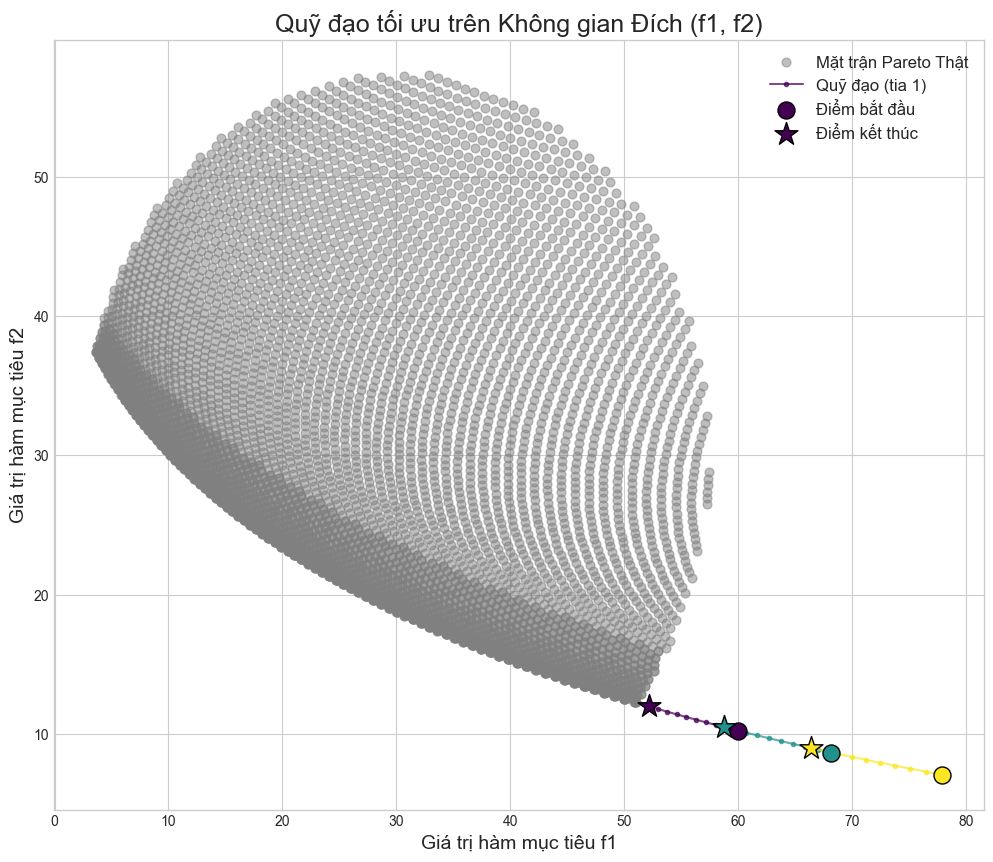

In [9]:
print("--- Bắt đầu tính toán và phân tích ---")
t1 = time.time()
hnet.eval()
ode_trained.eval()
tmp = []
pf_pred = []
pf_true = []
objective_space_trajectories = [] # List để lưu các quỹ đạo trên không gian đích

with torch.no_grad():
    for r in test_rays[-3:]:
        r = r/(r.sum())
        ray_t = torch.tensor(r.tolist(), dtype=torch.float32).unsqueeze(0)
        F_ = np.max((ray_t.detach().cpu().numpy())*(target_space),axis = 1)
        y_test,sol_test= target_space[F_.argmin(), :],sols[F_.argmin(), :,:]
        pf_true.append(y_test)
        x0_test = hnet(ray_t)
        
        # z_test có shape (10, 1, 4), là một tensor 3D
        z_test = ode_trained(x0_test, times1, return_whole_sequence=True)

        # ====> THAY ĐỔI NẰM Ở ĐÂY <====
        # 1. Tính toán TOÀN BỘ quỹ đạo trên không gian đích chỉ bằng 2 dòng lệnh
        #    Vì z_test đã là 3D, nó hoàn toàn hợp lệ cho các hàm l1, l2
        f1_path_tensor = l1(z_test)
        f2_path_tensor = l2(z_test)
        
        # 2. Chuyển đổi sang numpy và lưu lại quỹ đạo
        #    .squeeze() để bỏ chiều batch=1, .numpy() để chuyển đổi
        obj_path = np.stack([
            f1_path_tensor.squeeze().numpy(),
            f2_path_tensor.squeeze().numpy()
        ], axis=1) # Ghép lại thành mảng shape (10, 2)
        objective_space_trajectories.append(obj_path)
        
        # 3. Lấy điểm cuối cùng từ quỹ đạo vừa tính để tính lỗi
        #    Đây chính là `obj1 = [l1(z_test[-1]), l2(z_test[-1])]` nhưng hiệu quả hơn
        obj1 = obj_path[-1] 
        pf_pred.append(obj1)
        # obj1 đã là numpy array, không cần np.array(obj1) nữa
        
        err = np.sum(np.abs(obj1-y_test))
        tmp.append(err)

t2 = time.time()
err_e = np.mean(np.array(tmp))
print(f"Run time: {t2-t1:.4f}s")
print(f"Error: {err_e:.4f}")
print("--- Kết thúc tính toán ---\n")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 10))

# Vẽ nền: Mặt trận Pareto thật
ax.scatter(target_space[:, 0], target_space[:, 1], s=40, c='gray', alpha=0.5, label='Mặt trận Pareto Thật')

# --- THAY ĐỔI QUAN TRỌNG ---
# Bỏ dòng vẽ tất cả các điểm kết thúc cùng lúc
# pf_pred_np = np.array(pf_pred)
# ax.scatter(pf_pred_np[:, 0], pf_pred_np[:, 1], s=200, c='red', marker='*', ...)

# Vẽ các quỹ đạo và các điểm tương ứng
colors = plt.cm.viridis(np.linspace(0, 1, len(objective_space_trajectories)))

for i, obj_traj in enumerate(objective_space_trajectories):
    f1_path, f2_path = obj_traj[:, 0], obj_traj[:, 1]
    
    # 1. Vẽ đường đi của quỹ đạo
    # Chỉ thêm label cho lần lặp đầu tiên để legend không bị lặp lại
    label_path = f'Quỹ đạo (tia {i+1})' if i == 0 else ""
    ax.plot(f1_path, f2_path, marker='.', linestyle='-', color=colors[i], alpha=0.7, zorder=2, label=label_path)
    
    # 2. Vẽ điểm BẮT ĐẦU tương ứng
    label_start = 'Điểm bắt đầu' if i == 0 else ""
    ax.scatter(f1_path[0], f2_path[0], color=colors[i], s=150, marker='o', edgecolors='black', zorder=4, label=label_start)
    
    # 3. Vẽ điểm KẾT THÚC tương ứng
    label_end = 'Điểm kết thúc' if i == 0 else ""
    ax.scatter(f1_path[-1], f2_path[-1], color=colors[i], s=300, marker='*', edgecolors='black', zorder=5, label=label_end)

# Cấu hình biểu đồ
ax.set_title("Quỹ đạo tối ưu trên Không gian Đích (f1, f2)", fontsize=18)
ax.set_xlabel("Giá trị hàm mục tiêu f1", fontsize=14)
ax.set_ylabel("Giá trị hàm mục tiêu f2", fontsize=14)
ax.legend(fontsize=12)
ax.grid(True)
plt.show()

### Sols space

ray: [0.1786932 0.8213068], value: (array([53.75810242, 11.59573746]), array([50.90495901, 12.2757893 ]))
ray: [0.13675691 0.86324309], value: (array([60.62488556, 10.10223389]), array([50.90495901, 12.2757893 ]))
ray: [0.0911856 0.9088144], value: (array([68.60148621,  8.5884552 ]), array([50.90495901, 12.2757893 ]))
Run time:  817.8205318450928
Error:  12.27017950239574


<Figure size 1600x800 with 0 Axes>

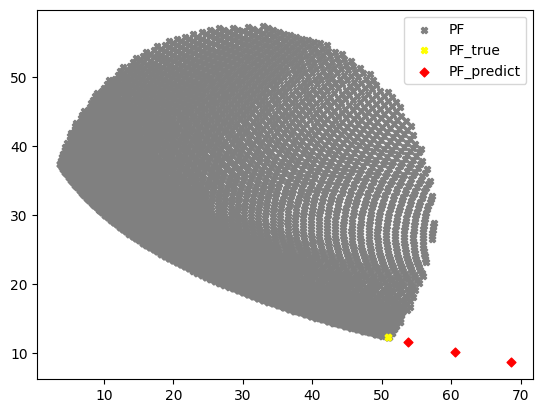

In [24]:
hnet.eval()
ode_trained.eval()
tmp = []
pf_pred = []
pf_true = []

list_x0_test = []
list_z_test = []
for r in test_rays[-3:]:
    r = r/(r.sum())
    ray_t = torch.tensor(r.tolist()).unsqueeze(0)
    F_ = np.max((ray_t.detach().cpu().numpy())*(target_space),axis = 1)
    y_test,sol_test= target_space[F_.argmin(), :],sols[F_.argmin(), :,:]
    pf_true.append(y_test)
    x0_test = hnet(ray_t)
    z_test = ode_trained(x0_test.unsqueeze(0),times1, return_whole_sequence=True)
    # collect
    list_x0_test.append(x0_test)
    list_z_test.append(z_test)
    
    obj1 = [l1(z_test[-1]).item(),l2(z_test[-1]).item()]
    pf_pred.append(obj1)
    obj1 = np.array(obj1)
    
    print(f"ray: {r}, value: {obj1,y_test}")
    err = np.sum(np.abs(obj1-y_test))
    tmp.append(err)
t2 = time.time()
err_e = np.mean(np.array(tmp))
print("Run time: ",t2-t1)
print("Error: ",err_e)
plot_trajectories(obs_true=np.array(pf_true),obs_predict=np.array(pf_pred),obs_pareto_front=target_space , figsize=(16, 8))

In [18]:
z_test_combined = np.stack([t.detach().cpu().numpy() for t in list_z_test])
x0_test_combined = np.stack([t.detach().cpu().numpy() for t in list_x0_test])

In [22]:
from scipy.spatial import ConvexHull, Delaunay
import matplotlib.pyplot as plt

Tìm thấy 3 trường hợp bắt đầu và kết thúc đều nằm ngoài miền khả thi.


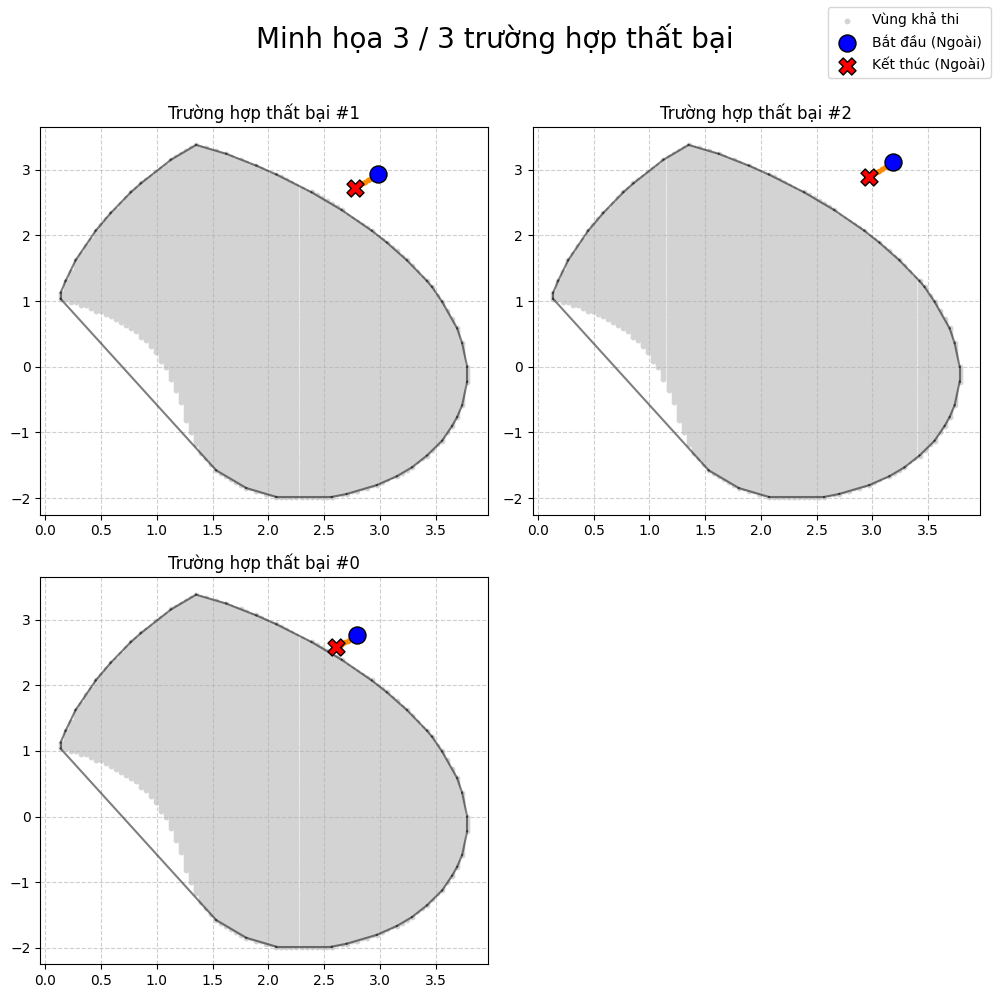

In [23]:
trajectories = z_test_combined.reshape(-1, 10, 4)
feasible_points = problem.sols.reshape(-1, 2)

try:
    hull = ConvexHull(feasible_points)
    delaunay_hull = Delaunay(hull.points[hull.vertices])
    def is_inside(point_xy):
        return delaunay_hull.find_simplex(point_xy) >= 0
except Exception as e:
    print(f"Lỗi khi tạo Convex Hull: {e}. Không thể tiếp tục.")
    exit()

# 2. Lọc ra các chỉ số của những trường hợp "thất bại"
failed_indices = []
for i, path in enumerate(trajectories):
    start_point = path[0, :2]
    end_point = path[-1, :2]
    
    # Điều kiện: Bắt đầu BÊN NGOÀI VÀ kết thúc BÊN NGOÀI
    if not is_inside(start_point) and not is_inside(end_point):
        failed_indices.append(i)

# 3. Chuẩn bị vẽ
num_failures = len(failed_indices)
print(f"Tìm thấy {num_failures} trường hợp bắt đầu và kết thúc đều nằm ngoài miền khả thi.")

if num_failures == 0:
    print("Chúc mừng! Không có trường hợp nào thất bại.")
else:
    # Chọn ngẫu nhiên tối đa 9 trường hợp để vẽ
    num_to_plot = min(num_failures, 9)
    indices_to_plot = np.random.choice(failed_indices, num_to_plot, replace=False)
    
    # Tạo lưới biểu đồ, kích thước linh hoạt
    nrows = int(np.ceil(np.sqrt(num_to_plot)))
    ncols = int(np.ceil(num_to_plot / nrows))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows), squeeze=False)

    # 4. Vẽ các trường hợp thất bại
    for i, ax in enumerate(axes.flatten()):
        if i < num_to_plot:
            idx = indices_to_plot[i]
            path = trajectories[idx]
            x1, x2 = path[:, 0], path[:, 1]
            
            # Vẽ nền: Vùng khả thi và đường biên của nó
            ax.scatter(feasible_points[:, 0], feasible_points[:, 1], s=10, c="lightgray", label="Vùng khả thi")
            for simplex in hull.simplices:
                ax.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'k-', alpha=0.5)

            # Vẽ quỹ đạo thất bại
            ax.plot(x1, x2, marker='.', linestyle='-', color='darkorange', zorder=2)
            
            # Đánh dấu điểm bắt đầu (ngoài)
            ax.scatter(x1[0], x2[0], color='blue', s=150, marker='o', label='Bắt đầu (Ngoài)', zorder=3, edgecolors='black')
            
            # Đánh dấu điểm kết thúc (ngoài)
            ax.scatter(x1[-1], x2[-1], color='red', s=150, marker='X', label='Kết thúc (Ngoài)', zorder=3, edgecolors='black')
            
            ax.set_title(f'Trường hợp thất bại #{idx}')
            ax.grid(True, linestyle='--', alpha=0.6)
        else:
            # Ẩn các ô thừa nếu có
            ax.set_visible(False)

    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.suptitle(f'Minh họa {num_to_plot} / {num_failures} trường hợp thất bại', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

> `Các trường hợp này đều do x_0 được sinh ra bởi hnet() nằm xa miền feasible, mà NNODEF không đưa được vào trong với bước thời gian chưa đủ dài`

# Tăng thêm quỹ đạo di chuyển từ x0 tới target

# Tăng epoch

# Xem lại bản chất ~ RNN = NNODE

=> Thống kê các **r (ray)** mà làm cho **hnet()** trả về **x0** bị xa:

In [31]:
hnet.eval() 
num_stat_rays = 200
r1_values = np.linspace(0.01, 0.99, num_stat_rays)
stat_rays = np.array([[r1, 1 - r1] for r1 in r1_values])


list_x0_stat = []
list_r_stat = []

with torch.no_grad(): # Tối ưu hóa, không cần tính gradient
    for r in stat_rays:
        ray_t = torch.tensor(r.tolist(), dtype=torch.float32).unsqueeze(0)
        x0_test = hnet(ray_t)
        
        list_x0_stat.append(x0_test.squeeze(0).numpy())
        list_r_stat.append(r)

# Chuyển list thành các mảng NumPy lớn để xử lý
all_x0s = np.array(list_x0_stat)
all_rays = np.array(list_r_stat)

In [36]:
feasible_points = problem.sols.reshape(-1, 2)
try:
    hull = ConvexHull(feasible_points)
    delaunay_hull = Delaunay(hull.points[hull.vertices])
    def is_inside(point_xy):
        return delaunay_hull.find_simplex(point_xy) >= 0
except Exception as e:
    print(f"Lỗi khi tạo Convex Hull: {e}. Không thể tiếp tục.")
    exit()

# 3. Phân loại và thống kê
x0s_inside, x0s_outside = [], []
rays_causing_inside, rays_causing_outside = [], []
for r, x0 in zip(all_rays, all_x0s):
    point_xy = x0[:2]
    if is_inside(point_xy):
        x0s_inside.append(point_xy)
        rays_causing_inside.append(r)
    else:
        x0s_outside.append(point_xy)
        rays_causing_outside.append(r)
x0s_inside, x0s_outside = np.array(x0s_inside), np.array(x0s_outside)
rays_causing_inside, rays_causing_outside = np.array(rays_causing_inside), np.array(rays_causing_outside)

# In kết quả thống kê
total_x0s = len(all_x0s)
outside_count = len(x0s_outside)
print("\n" + "="*50)
print(" KẾT QUẢ KHẢO SÁT HYPERNETWORK (hnet)")
print("="*50)
print(f"Tổng số điểm x0 được tạo ra: {total_x0s}")
print(f"Số lượng x0 nằm BÊN NGOÀI miền khả thi: {outside_count} ({outside_count/total_x0s:.2%})")
print(f"Số lượng x0 nằm BÊN TRONG miền khả thi: {total_x0s - outside_count} ({(total_x0s - outside_count)/total_x0s:.2%})")
print("="*50)


 KẾT QUẢ KHẢO SÁT HYPERNETWORK (hnet)
Tổng số điểm x0 được tạo ra: 200
Số lượng x0 nằm BÊN NGOÀI miền khả thi: 59 (29.50%)
Số lượng x0 nằm BÊN TRONG miền khả thi: 141 (70.50%)


In [37]:
rays_causing_outside

array([[0.01      , 0.99      ],
       [0.01492462, 0.98507538],
       [0.01984925, 0.98015075],
       [0.02477387, 0.97522613],
       [0.02969849, 0.97030151],
       [0.03462312, 0.96537688],
       [0.03954774, 0.96045226],
       [0.04447236, 0.95552764],
       [0.04939698, 0.95060302],
       [0.05432161, 0.94567839],
       [0.05924623, 0.94075377],
       [0.06417085, 0.93582915],
       [0.06909548, 0.93090452],
       [0.0740201 , 0.9259799 ],
       [0.07894472, 0.92105528],
       [0.08386935, 0.91613065],
       [0.08879397, 0.91120603],
       [0.09371859, 0.90628141],
       [0.09864322, 0.90135678],
       [0.10356784, 0.89643216],
       [0.10849246, 0.89150754],
       [0.11341709, 0.88658291],
       [0.11834171, 0.88165829],
       [0.12326633, 0.87673367],
       [0.12819095, 0.87180905],
       [0.13311558, 0.86688442],
       [0.1380402 , 0.8619598 ],
       [0.14296482, 0.85703518],
       [0.14788945, 0.85211055],
       [0.15281407, 0.84718593],
       [0.

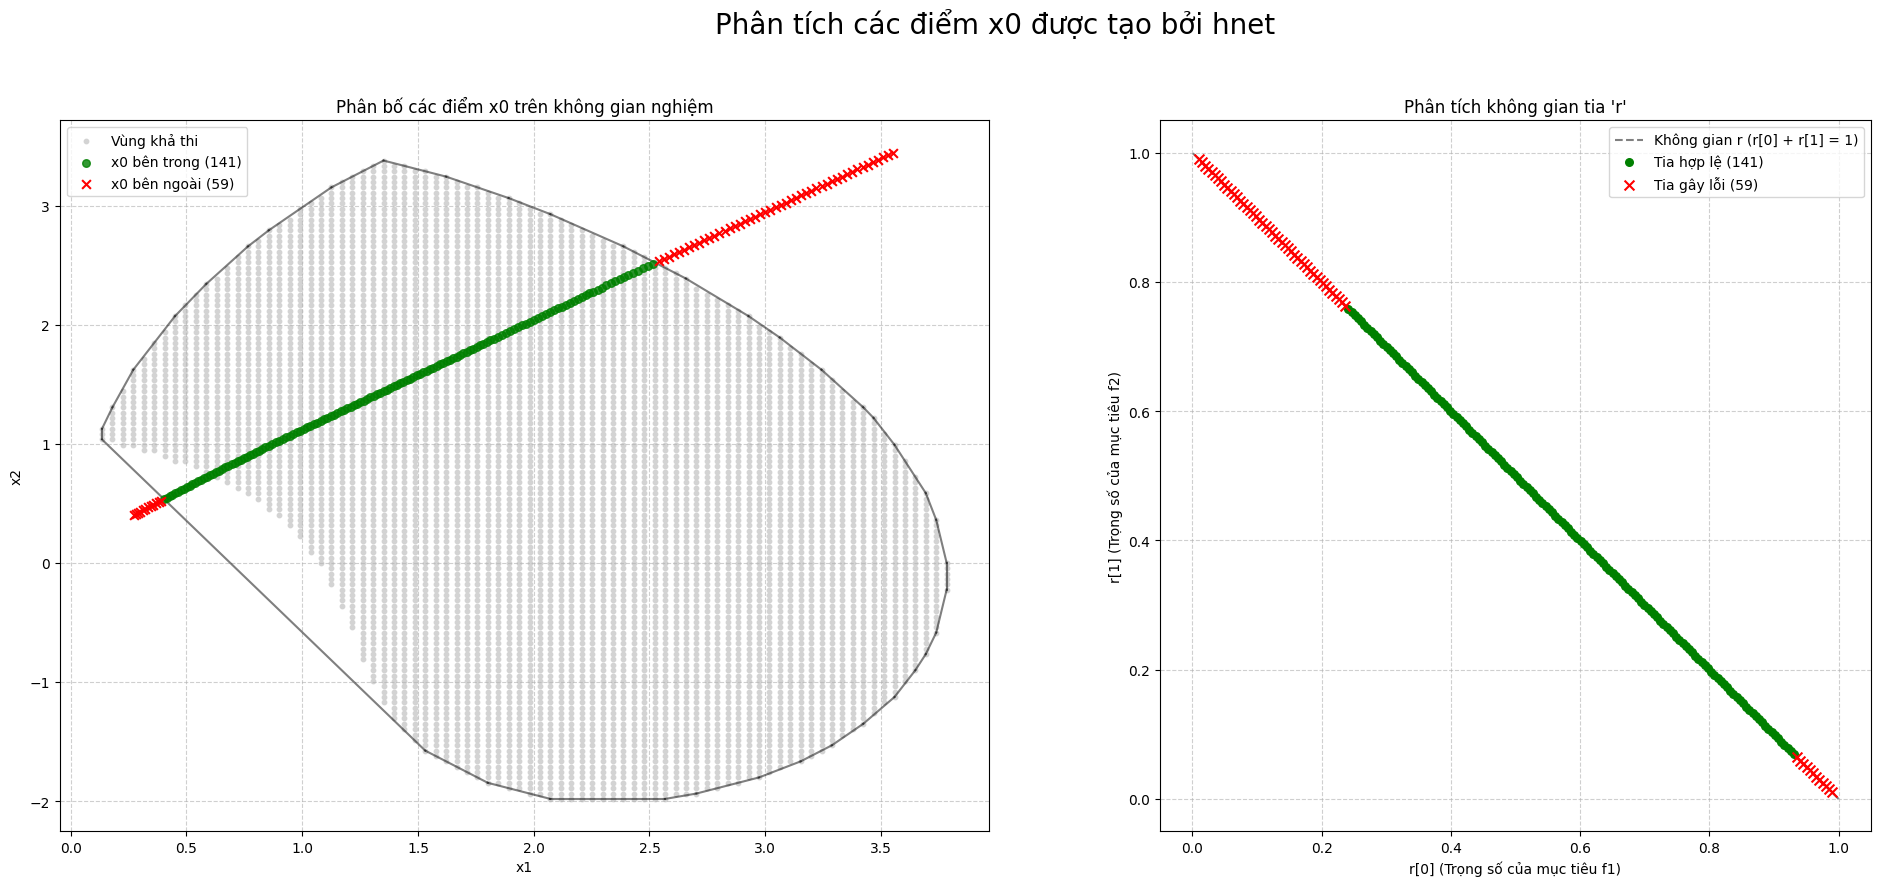

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
fig.suptitle("Phân tích các điểm x0 được tạo bởi hnet", fontsize=20)

# --- Subplot 1: Phân bố các điểm x0 (Không đổi) ---
ax1.set_title("Phân bố các điểm x0 trên không gian nghiệm")
ax1.scatter(feasible_points[:, 0], feasible_points[:, 1], s=10, c="lightgray", label="Vùng khả thi")
for simplex in hull.simplices:
    ax1.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'k-', alpha=0.5)
if len(x0s_inside) > 0:
    ax1.scatter(x0s_inside[:, 0], x0s_inside[:, 1], s=30, c='green', label=f'x0 bên trong ({len(x0s_inside)})', alpha=0.8, zorder=3)
if len(x0s_outside) > 0:
    ax1.scatter(x0s_outside[:, 0], x0s_outside[:, 1], s=40, c='red', marker='x', label=f'x0 bên ngoài ({len(x0s_outside)})', zorder=3)
ax1.set_xlabel("x1"), ax1.set_ylabel("x2")
ax1.legend(), ax1.grid(True, linestyle='--', alpha=0.6)

# --- Subplot 2: Phân bố các tia r trong không gian 2D (ĐÃ CẬP NHẬT) ---
ax2.set_title("Phân tích không gian tia 'r'")
ax2.set_xlabel("r[0] (Trọng số của mục tiêu f1)")
ax2.set_ylabel("r[1] (Trọng số của mục tiêu f2)")

# Vẽ đường r[0] + r[1] = 1 để làm bối cảnh
ax2.plot([1, 0], [0, 1], color='gray', linestyle='--', label='Không gian r (r[0] + r[1] = 1)')

# Vẽ các tia tạo ra x0 hợp lệ
if len(rays_causing_inside) > 0:
    ax2.scatter(rays_causing_inside[:, 0], rays_causing_inside[:, 1],
                s=30, c='green', label=f'Tia hợp lệ ({len(rays_causing_inside)})', zorder=2)

# Vẽ các tia gây ra lỗi
if len(rays_causing_outside) > 0:
    ax2.scatter(rays_causing_outside[:, 0], rays_causing_outside[:, 1],
                s=50, c='red', marker='x', label=f'Tia gây lỗi ({len(rays_causing_outside)})', zorder=3)

# Cấu hình trục để dễ nhìn
ax2.set_xlim(-0.05, 1.05)
ax2.set_ylim(-0.05, 1.05)
ax2.set_aspect('equal', adjustable='box') # Đảm bảo tỉ lệ 1:1
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Hyper + Naliu

In [6]:
f1 = problem.f1
f2 = problem.f2

[ 3.5826797 37.597733 ] [ 3.65230095 37.39956172]
[ 3.5851293 37.578896 ] [ 5.55961367 34.72323675]
[ 4.563247 36.093826] [ 7.15850986 32.87070855]
[ 5.890629 34.360123] [ 8.58696534 31.42602062]
[ 7.3898067 32.666477 ] [10.14528042 30.01379758]
[ 9.037672 31.035168] [11.40329519 28.97694992]
[10.71143 29.56205] [13.18886454 27.62154046]
[12.407778 28.215746] [14.6092038  26.62527392]
[14.155646 26.95211 ] [16.1107053  25.64929795]
[15.972599 25.747221] [17.14958201 25.00811622]
[17.864508 24.590681] [18.76471066 24.06054703]
[19.839851 23.473263] [20.46100154 23.1332684 ]
[21.909344 22.386854] [22.22222222 22.22222222]
[23.970215 21.378853] [24.06460515 21.3314666 ]
[26.126112 20.393192] [25.97191786 20.45694343]
[28.931164 19.202374] [27.96039283 19.60271082]
[32.03733  17.988161] [30.01379758 18.76471066]
[35.394867 16.78172 ] [32.14836458 17.94700106]
[39.046318 15.577259] [35.10267024 16.88377567]
[43.21724  14.319477] [38.97410924 15.59938317]
[48.29677  12.933188] [42.22059898 1

<Figure size 1600x800 with 0 Axes>

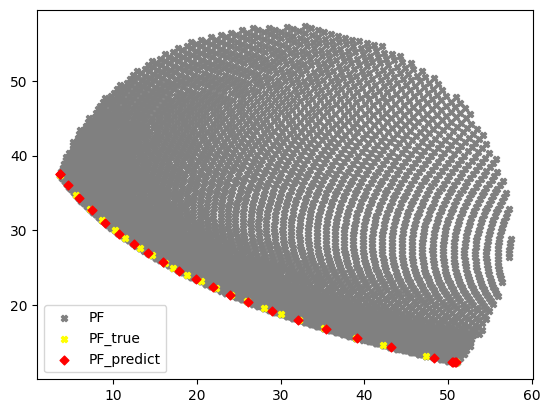

In [7]:
hnet.eval()
tmp = []
x0 = []
x_target = []
t_max = 4
n_points = 10
def s(x,r):
    return np1.max(np.array([r[0]*f1(x),r[1]*f2(x)]))
index_np = np.arange(0, n_points, 1)
index_np = np.hstack([index_np[:, None]])
times_np = np.linspace(0, t_max, num=n_points)
times_np = np.hstack([times_np[:, None]])
t1 = time.time()
pf_pred = []
pf_true = []
for r in test_rays:
    r = r/(r.sum())
    ray_t = torch.tensor(r.tolist())
    F_ = np.max((ray_t.detach().cpu().numpy())*(target_space),axis = 1)
    y_test,sol_test= target_space[F_.argmin(), :],sols[F_.argmin(), :,:]
    pf_true.append(y_test)
    func1 = TestODEF(Tensor([[-0.1, -0.5], [0.5, -0.1]]), Tensor([[0.2, 1.], [-1, 0.2]]), Tensor([[-1., 0.]]),s,ray_t.detach().cpu().numpy())
    ode_true = NeuralODE(func1)
    ray_t = ray_t.unsqueeze(0)
    # print(ray_t)
    output = hnet(ray_t)
    
    times1 = torch.from_numpy(times_np[:, :, None]).to(output)
    obs = ode_true(output, times1, return_whole_sequence=True).detach()
    obj1 = [f1(obs[-1]),f2(obs[-1])]
    pf_pred.append(obj1)
    obj1 = torch.stack(obj1).detach().cpu().numpy()
    err = np.sum(np.abs(obj1-y_test))
    print(obj1,y_test)
    tmp.append(err)
t2 = time.time()
print("ERR_test: ",np.mean(np.array(tmp)))
print("Run time: ",t2-t1)
plot_trajectories(obs_true=np.array(pf_true),obs_predict=np.array(pf_pred),obs_pareto_front=target_space , figsize=(16, 8))

# Naliu

In [1]:
def s(x,r):
    return np1.max(np.array([r[0]*f1(x),r[1]*f2(x)]))

[ 3.6433394 37.576073 ] [ 3.65230095 37.39956172]
[ 3.6296716 37.662148 ] [ 5.55961367 34.72323675]
[ 3.5749226 37.555138 ] [ 7.15850986 32.87070855]
[ 3.7224631 38.023994 ] [ 8.58696534 31.42602062]
[ 4.1243477 39.25772  ] [10.14528042 30.01379758]
[ 4.199353 39.360767] [11.40329519 28.97694992]
[ 4.121229 38.56876 ] [13.18886454 27.62154046]
[ 3.6750293 37.842228 ] [14.6092038  26.62527392]
[ 3.5876908 37.503494 ] [16.1107053  25.64929795]
[ 4.5593996 36.97621  ] [17.14958201 25.00811622]
[ 3.9106917 37.620995 ] [18.76471066 24.06054703]
[ 3.6060045 37.61245  ] [20.46100154 23.1332684 ]
[ 3.8398762 38.089848 ] [22.22222222 22.22222222]
[ 4.4864655 36.282967 ] [24.06460515 21.3314666 ]
[ 3.1009846 38.32582  ] [25.97191786 20.45694343]
[ 3.6178112 37.569107 ] [27.96039283 19.60271082]
[ 4.106214 37.574013] [30.01379758 18.76471066]
[ 2.4810462 39.795147 ] [32.14836458 17.94700106]
[ 4.041254 38.972572] [35.10267024 16.88377567]
[ 4.508091 37.5214  ] [38.97410924 15.59938317]
[ 3.812428

<Figure size 1600x800 with 0 Axes>

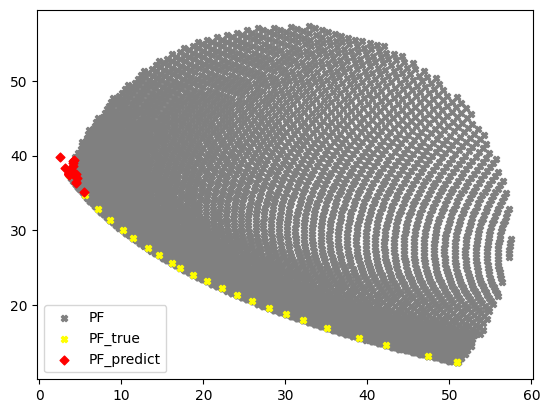

In [9]:
tmp = []
x0 = []
x_target = []
t_max = 4
n_points = 10

index_np = np.hstack([index_np[:, None]])
times_np = np.linspace(0, t_max, num=n_points)
times_np = np.hstack([times_np[:, None]])
t1 = time.time()
pf_pred = []
pf_true = []
for r in test_rays:
    r = r/(r.sum())
    ray_t = torch.tensor(r.tolist())
    F_ = np.max((ray_t.detach().cpu().numpy())*(target_space),axis = 1)
    y_test,sol_test= target_space[F_.argmin(), :],sols[F_.argmin(), :,:]
    pf_true.append(y_test)
    func1 = TestODEF(Tensor([[-0.1, -0.5], [0.5, -0.1]]), Tensor([[0.2, 1.], [-1, 0.2]]), Tensor([[-1., 0.]]),s,ray_t.detach().cpu().numpy())
    ode_true = NeuralODE(func1)
    ray_t = ray_t.unsqueeze(0)
    output = torch.rand(1,4)
    # print(output)
    times1 = torch.from_numpy(times_np[:, :, None]).to(output)
    obs = ode_true(output, times1, return_whole_sequence=True).detach()
    obj1 = [f1(obs[-1]),f2(obs[-1])]
    pf_pred.append(obj1)
    obj1 = torch.stack(obj1).detach().cpu().numpy()
    err = np.sum(np.abs(obj1-y_test))
    print(obj1,y_test)
    tmp.append(err)
t2 = time.time()
print("ERR_test: ",np.mean(np.array(tmp)))
print("Run time: ",t2-t1)
plot_trajectories(obs_true=np.array(pf_true),obs_predict=np.array(pf_pred),obs_pareto_front=target_space , figsize=(16, 8))